# Indicators of Heavy Traffic on I-94

In this project we are going to analuze a dataset that is about the westbound traffic on [I-94](https://en.wikipedia.org/wiki/Interstate_94) Interstate Highway. The goal of the project is to determine a few indicators of heavy traffic on I-94.

## Investigation

We first look at the `Metro_Interstate_Traffic_Volume.csv` file for our dataset. We will be using pandas to load the CSV. This dataset was made by John Houghs and can be found [here](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume).

In [1]:
# !wget -O 'Metro_Interstate_Traffic_Volume.zip' https://archive.ics.uci.edu/static/public/492/metro+interstate+traffic+volume.zip
# !unzip -o Metro_Interstate_Traffic_Volume.zip
# !gzip -f -d Metro_Interstate_Traffic_Volume.csv.gz

# !conda install -y -n dataquest pandas numpy matplotlib seaborn scikit-learn

Uncomment the above cell to get the dataset.

## Data Exploration

We will start by exploring the dataset to understand the data better. We first import pandas, matplotlib and seaborn libraries.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Now we load the data that was downloaded from the initial cell and display the first few rows of the dataset.

In [3]:
df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


Series of note are:
- `holiday`: Categorical US National holidays plus regional holiday, Minnesota State Fair
- `temp`: Numeric Average temp in kelvin
- `rain_1h`: Numeric Amount in mm of rain that occurred in the hour
- `snow_1h`: Numeric Amount in mm of snow that occurred in the hour
- `clouds_all`: Numeric Percentage of cloud cover
- `weather_main`: Categorical Short textual description of the current weather
- `weather_description`: Categorical Longer textual description of the current weather
- `date_time`: DateTime Hour of the data collected in local CST time
- `traffic_volume`: Numeric Hourly I-94 ATR 301 reported westbound traffic volume

We now examine the tail of the dataframe. We will also check for missing values and data types of the columns. One column of note is holiday which has a lot of missing values. This column might not be useful for our analysis.

In [4]:
df.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,NaN,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The dataset documentation mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west).

## Data Analysis

We will now analyze the `traffic_volume` column to determine the indicators of heavy traffic. We will start by plotting a histogram of the `traffic_volume` column.

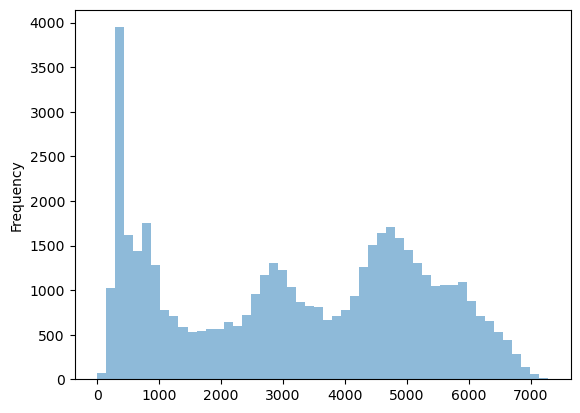

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [6]:
%matplotlib inline

df['traffic_volume'].plot.hist(bins=50, alpha=0.5)
plt.show()
df['traffic_volume'].describe()


We continue explorationn by seeing if the morning or evening is more likely to have heavy traffic. We will do this by dividing the dataset into two parts: Daytime (7 a.m. to 7 p.m.) and Nighttime (7 p.m. to 7 a.m.). We will then compare the traffic volume at different times of the day.

In [7]:
df['date_time'] = pd.to_datetime(df['date_time'])
df['hour'] = df['date_time'].dt.hour
df['minute'] = df['date_time'].dt.minute
df['month'] = df['date_time'].dt.month
df['day'] = df['date_time'].dt.dayofweek
df['year'] = df['date_time'].dt.year
df['date'] = df['date_time'].dt.date
df['day_of_week'] = df['date_time'].dt.day_of_week
df['date_time'].head()

0   2012-10-02 09:00:00
1   2012-10-02 10:00:00
2   2012-10-02 11:00:00
3   2012-10-02 12:00:00
4   2012-10-02 13:00:00
Name: date_time, dtype: datetime64[ns]

Now let's split the dataset into two parts: Daytime and Nighttime.

In [8]:
night_mask = (df['hour'] < 7) | (df['hour'] > 19)
day_mask = (df['hour'] >= 7) & (df['hour'] <= 19)

day = df[day_mask]
night = df[night_mask]

We grab a sample from the night dataset, as well as day dataset to see if the data is consistent with the histograms.

In [9]:
night.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour,minute,month,day,year,date,day_of_week
11,NaN,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784,20,0,10,1,2012,2012-10-02,1
12,NaN,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361,21,0,10,1,2012,2012-10-02,1
13,NaN,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529,22,0,10,1,2012,2012-10-02,1
14,NaN,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963,23,0,10,1,2012,2012-10-02,1
15,NaN,284.63,0.0,0.0,1,Clear,sky is clear,2012-10-03 00:00:00,506,0,0,10,2,2012,2012-10-03,2


In [10]:
day.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour,minute,month,day,year,date,day_of_week
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9,0,10,1,2012,2012-10-02,1
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,0,10,1,2012,2012-10-02,1
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11,0,10,1,2012,2012-10-02,1
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12,0,10,1,2012,2012-10-02,1
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13,0,10,1,2012,2012-10-02,1


Text(0.5, 0, 'Traffic Volume')

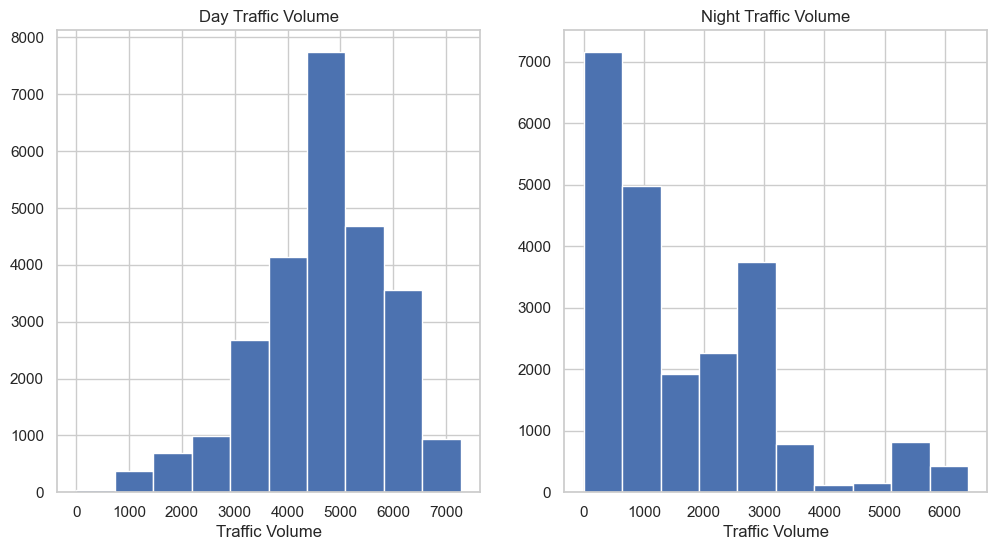

In [11]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.title('Day Traffic Volume')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.title('Night Traffic Volume')
plt.xlabel('Traffic Volume')

We now check the statistics behind the traffic volumes of both day and night datasets. 

In [12]:
day['traffic_volume'].describe()

count    25838.000000
mean      4649.292360
std       1202.321987
min          0.000000
25%       4021.000000
50%       4736.000000
75%       5458.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [13]:
night['traffic_volume'].describe()

count    22366.000000
mean      1654.648484
std       1425.175292
min          0.000000
25%        486.000000
50%       1056.500000
75%       2630.750000
max       6386.000000
Name: traffic_volume, dtype: float64

The shape of the histograms are different. The day traffic volume is right skewed, while the night traffic volume is left skewed. The traffic volume is higher during the day than during the night.

In [14]:
by_month = day.groupby('month')['traffic_volume'].mean()
by_month

month
1     4385.217310
2     4593.187798
3     4761.529676
4     4771.232816
5     4788.966639
6     4791.087488
7     4502.628360
8     4818.434690
9     4755.709916
10    4809.481678
11    4588.910486
12    4276.567081
Name: traffic_volume, dtype: float64

<Axes: xlabel='month', ylabel='traffic_volume'>

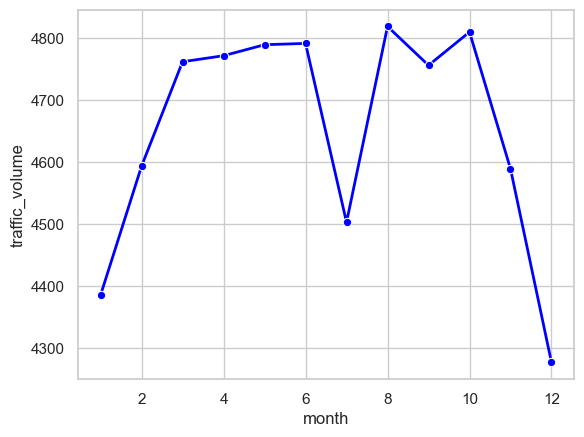

In [15]:
sns.lineplot(data=by_month, marker='o', color='blue', linewidth=2)

We notice that traffic volume in winter months are lower than pther months, with a dip in July. The traffic volume is higher in the summer months.

Now let's investigate the linegraph for traffic volume by day of the week.

In [16]:
by_day_of_week = day.groupby('day_of_week')['traffic_volume'].mean()
by_day_of_week

day_of_week
0    4746.208029
1    5036.062431
2    5141.231163
3    5163.688063
4    5161.533588
5    3884.065668
6    3410.368091
Name: traffic_volume, dtype: float64

Let's now look at the by_day_of_week dataset to see if the data is consistent with the line graph. We will also check the statistics behind the traffic volumes of the by_day_of_week dataset.

<Axes: xlabel='day_of_week', ylabel='traffic_volume'>

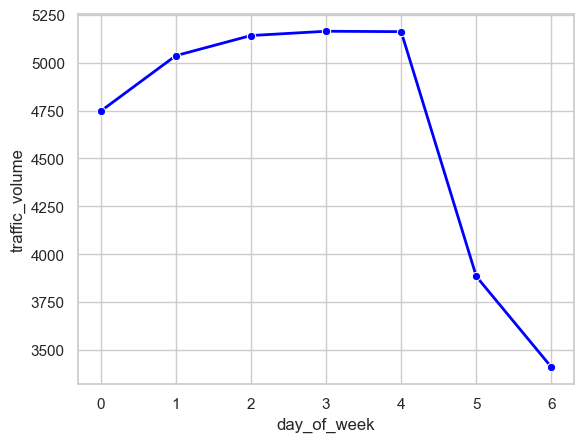

In [17]:
sns.lineplot(data=by_day_of_week, marker='o', color='blue', linewidth=2)

Let's investigate the linegraph for traffic volume by time of the day. Traffic volume during business days (Monday - Friday) is higher than weekends. Let's look at the by hour traffic volume between business days and weekends.

In [18]:
bussiness_days = day.copy()[day['day_of_week'] <= 4]
weekend = day.copy()[day['day_of_week'] >= 5]

by_hour_business = bussiness_days.groupby('hour')['traffic_volume'].mean()
by_hour_weekend = weekend.groupby('hour')['traffic_volume'].mean()

print(by_hour_business)
print(by_hour_weekend)

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
19    3298.340426
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
19    3220.234120
Name: traffic_volume, dtype: float64


Text(0, 0.5, 'Traffic Volume')

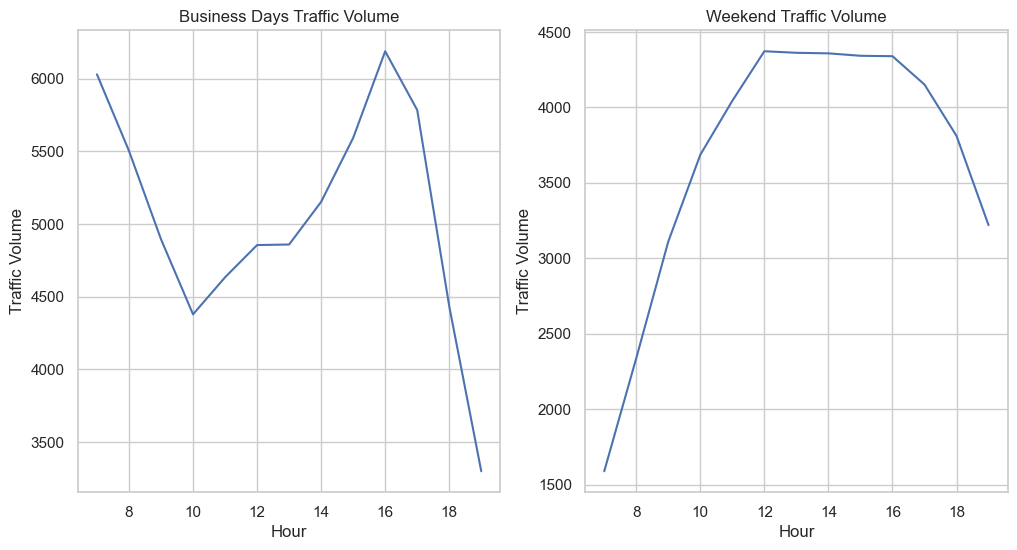

In [19]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(by_hour_business)
plt.title('Business Days Traffic Volume')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.plot(by_hour_weekend)
plt.title('Weekend Traffic Volume')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')


The plots above show that traffic volume is higher during business days compared to weekends. On the business days we see a dip between 7 and 10, indicating people being at their workstation. Weekend traffic volume is more evenly distributed throughout the day.

In [20]:
df['weather_main'].value_counts()

weather_main
Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: count, dtype: int64

In [21]:
df.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume', 'hour', 'minute',
       'month', 'day', 'year', 'date', 'day_of_week'],
      dtype='object')

In [22]:
rain_1h_corr= df['traffic_volume'].corr(df['rain_1h'])
snow_1h_corr = df['traffic_volume'].corr(df['snow_1h'])
clouds_all_corr = df['traffic_volume'].corr(df['clouds_all'])
temperature_corr = df['traffic_volume'].corr(df['temp'])

print("Rain: ", rain_1h_corr)
print("Snow: ", snow_1h_corr)
print("Clouds: ", clouds_all_corr)
print("Temperature: ", temperature_corr)

Rain:  0.004713702367859229
Snow:  0.0007334345358283802
Clouds:  0.06705377704283517
Temperature:  0.13029879817112675


What we know so far is that the following are indicators of heavy traffic on I-94:
- Traffic volume is higher during the day compared to night.
- Traffic volume is higher during the summer months compared to winter months.
- Traffic volume is higher during business days compared to weekends.

Looking at the correlation between rain, snow, temperature, and traffic volume, we see that temperature has the highest correlation with traffic volume.

<Axes: ylabel='weather_main'>

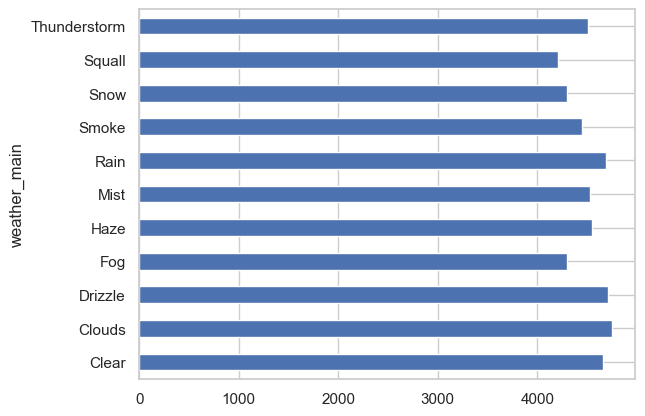

In [23]:
by_weather_main = day.groupby('weather_main')['traffic_volume'].mean()
by_weather_main.plot.barh()

<Axes: ylabel='weather_description'>

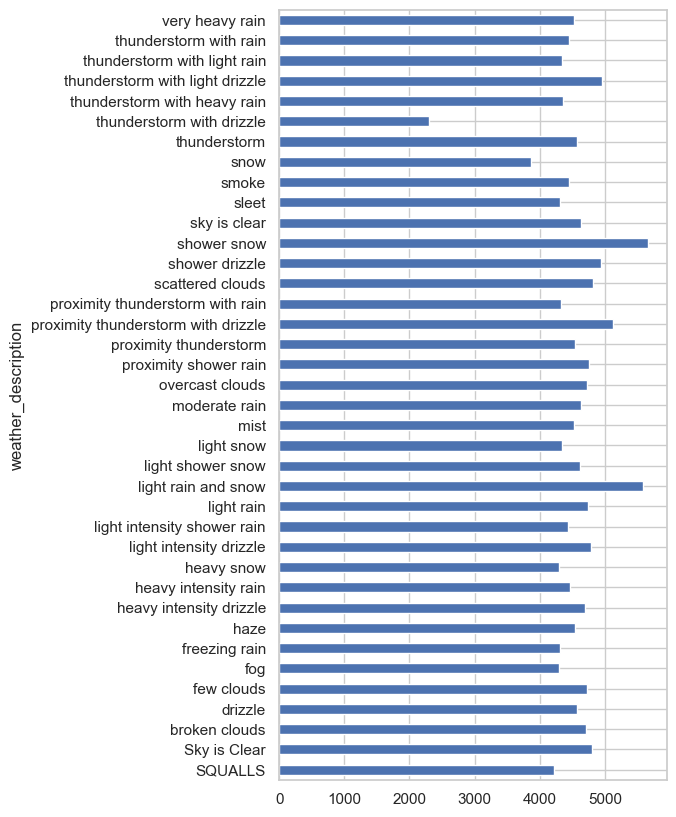

In [24]:
by_weather_description = day.groupby('weather_description')['traffic_volume'].mean()
by_weather_description.plot.barh(figsize=(5, 10))


# Conclusion

In this project we analyzed a dataset that contains information about the westbound traffic on I-94. We found that traffic volume is higher during the day compared to night, higher during the summer months compared to winter months, and higher during business days compared to weekends. We also found that temperature has the highest correlation with traffic volume.